# Statistics Analysis Bomberman Project

### Packages

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Append current directory
current_directory = os.path.abspath("data_analysis")
if current_directory not in sys.path:
    sys.path.append(current_directory)
# Plot
import plot_options

## Load data

In [5]:
def load_data(file_path):
    """
    Load csv into a dataframe
    """
    
    if not os.path.isfile(file_path):
        print(f"File not found in: {file_path}")
        sys.exit(1)

    data = pd.read_csv(file_path)
    return data

file_root = "data_analysis/data_for_report/"

ts_1_1_1_1 = load_data(file_root + "ts-1-1-1-1.csv")
ts_2_1_1_4 = load_data(file_root + "ts-2-1-1-4.csv")
ts_nat_1_1_1 = load_data(file_root + "ts-nat-1-1-1.csv")
ts_2_1_1_4.columns

Index(['Start Timestamp', 'Elapsed Time (s)', 'Rounds Played', 'Score',
       'Total Reward', 'Loss', 'BOMB_DROPPED', 'BOMB_EXPLODED',
       'COIN_COLLECTED', 'COIN_FOUND', 'CRATE_DESTROYED', 'GOT_KILLED',
       'INVALID_ACTION', 'KILLED_OPPONENT', 'KILLED_SELF', 'MOVED_DOWN',
       'MOVED_LEFT', 'MOVED_RIGHT', 'MOVED_UP', 'OPPONENT_ELIMINATED',
       'SURVIVED_ROUND', 'WAITED', 'UP', 'RIGHT', 'DOWN', 'LEFT', 'WAIT'],
      dtype='object')

### Learning to walk

In [3]:
# Want to calculate how many moves:
action_columns = ["UP", "RIGHT", "DOWN", "LEFT", "WAIT"]
action_columns_nat = ["UP", "RIGHT", "DOWN", "LEFT", "WAIT"]

invalid_ones_1_1_1_1 = ts_1_1_1_1["INVALID_ACTION"].values
invalid_ones_2_1_1_4 = ts_2_1_1_4["INVALID_ACTION"].values
invalid_ones_nat = ts_nat_1_1_1["INVALID_ACTION"].values

total_moves_1_1_1_1 = ts_1_1_1_1[action_columns].sum(axis = 1).values
total_moves_2_1_1_4 = ts_2_1_1_4[action_columns].sum(axis = 1).values
total_moves_nat = ts_nat_1_1_1[action_columns_nat].sum(axis = 1).values

total_rounds_1_1_1_1 = ts_1_1_1_1["Rounds Played"].cumsum().values
total_rounds_nat = ts_nat_1_1_1["Rounds Played"].cumsum().values

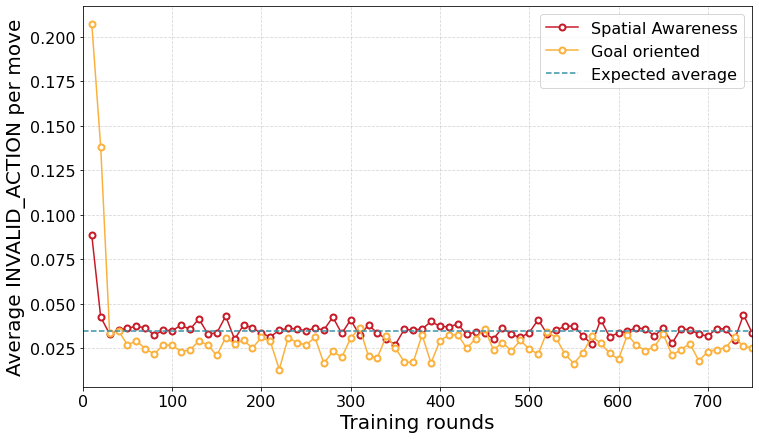

In [11]:
# Plot
fig, ax = plt.subplots(figsize = (12, 7))
#ax.plot(total_rounds_1_1_1_1, invalid_ones_1_1_1_1 / total_moves_1_1_1_1, label = "Enhanced Spatial Awareness")
ax.plot(total_rounds_1_1_1_1, invalid_ones_2_1_1_4 / total_moves_2_1_1_4, label = "Spatial Awareness")
ax.plot(total_rounds_nat, invalid_ones_nat / total_moves_nat, label = "Goal oriented")
ax.axhline(0.035, ls = '--', label = 'Expected average', marker = 'None', color = plot_options.color_palette[3])
ax.set_ylabel("Average INVALID_ACTION per move")
ax.set_xlabel("Training rounds")
ax.set_xlim(0, 750)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/learning_to_walk.png", dpi = 300)

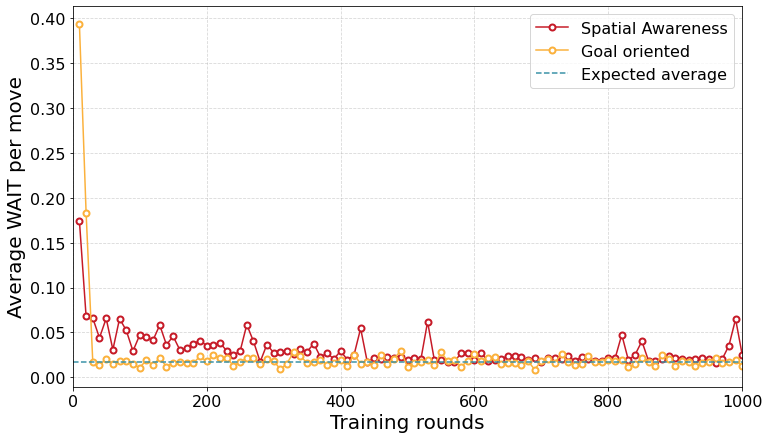

In [12]:
wait_ones_1_1_1_1 = ts_1_1_1_1["WAIT"].values
wait_ones_2_1_1_4 = ts_2_1_1_4["WAIT"].values
wait_ones_nat = ts_nat_1_1_1["WAIT"].values

# Plot
fig, ax = plt.subplots(figsize = (12, 7))
#ax.plot(total_rounds_1_1_1_1, wait_ones_1_1_1_1 / total_moves_1_1_1_1, label = "Enhanced Spatial Awareness")
ax.plot(total_rounds_1_1_1_1, wait_ones_2_1_1_4 / total_moves_2_1_1_4, label = "Spatial Awareness")
ax.plot(total_rounds_nat, wait_ones_nat / total_moves_nat, label = "Goal oriented")
ax.axhline(0.017, ls = '--', label = 'Expected average', marker = 'None', color = plot_options.color_palette[3])
ax.set_ylabel("Average WAIT per move")
ax.set_xlabel("Training rounds")
ax.set_xlim(0, 1000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/learning_to_walk_2.png", dpi = 300)

### Get a well paying job

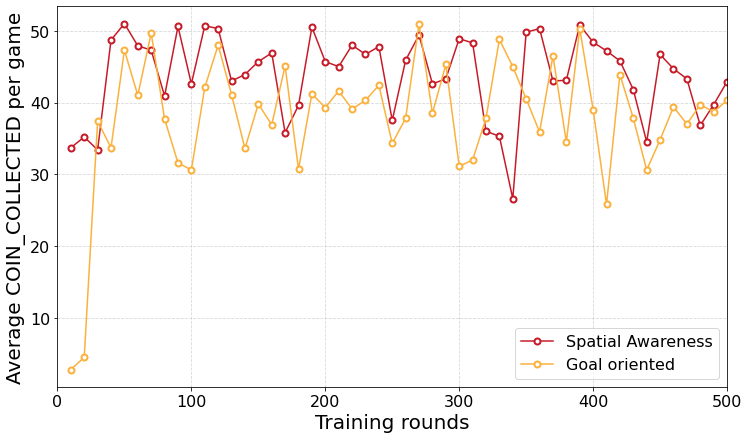

In [39]:
# Load new data
def analyze_stat(file_name, stat):
    ts = load_data(file_root + file_name)
    ts_stat = ts[stat].values
    ts_total_rounds = ts["Rounds Played"].cumsum().values
    ts_rounds_played = ts["Rounds Played"].values
    # Normalize to per game
    log_frequency = 10
    ts_stat = ts_stat / ts_rounds_played
    
    return ts_stat, ts_total_rounds


coins_dqn, total_rounds_dqn = analyze_stat("ts-coin-heaven-dqn.csv", "COIN_COLLECTED")
coins_nat, total_rounds_nat = analyze_stat("ts-nat-1-1-1.csv", "COIN_COLLECTED")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_dqn, coins_dqn, label = "Spatial Awareness")
ax.plot(total_rounds_nat, coins_nat, label = "Goal oriented")

ax.set_ylabel("Average COIN_COLLECTED per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(0, 500)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/get_a_well_paying_job.png", dpi = 300)

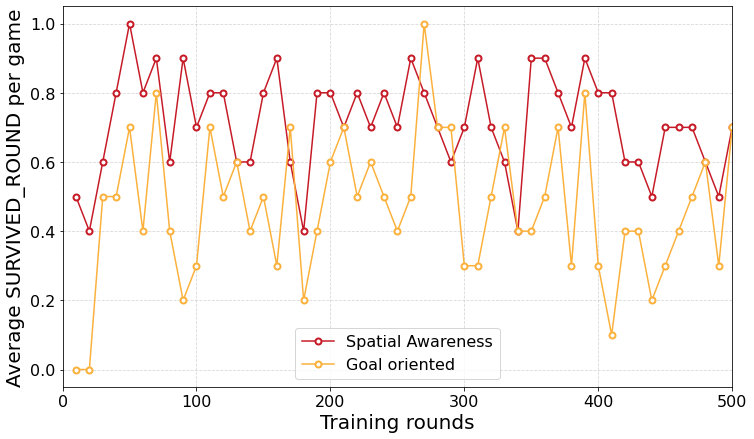

In [40]:
survived_dqn, total_rounds_dqn = analyze_stat("ts-coin-heaven-dqn.csv", "SURVIVED_ROUND")
survived_nat, total_rounds_nat = analyze_stat("ts-nat-1-1-1.csv", "SURVIVED_ROUND")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_dqn, survived_dqn, label = "Spatial Awareness")
ax.plot(total_rounds_nat, survived_nat, label = "Goal oriented")

ax.set_ylabel("Average SURVIVED_ROUND per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(0, 500)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/get_a_well_paying_job_2.png", dpi = 300)

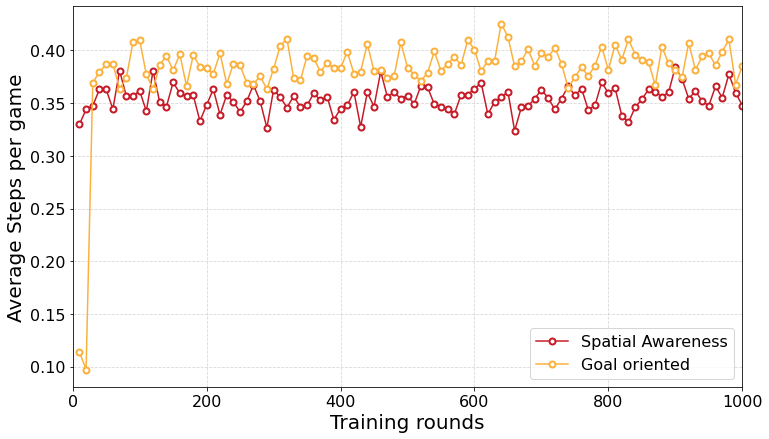

In [41]:
steps_dqn, total_rounds_dqn = analyze_stat("ts-coin-heaven-dqn.csv", "Steps")
#survived_nat, total_rounds_nat = analyze_stat("ts-nat-1-1-1.csv", "SURVIVED_ROUND")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_dqn, coins_dqn / steps_dqn, label = "Spatial Awareness")
ax.plot(total_rounds_nat, coins_nat / (total_moves_nat / 10), label = "Goal oriented")

ax.set_ylabel("Average Steps per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(0, 1000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/get_a_well_paying_job_3.png", dpi = 300)